CIFAR-10

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
X_train,X_test = X_train / 255.0,X_test / 255.0

In [6]:
y_train,y_test = y_train.flatten(),y_test.flatten()

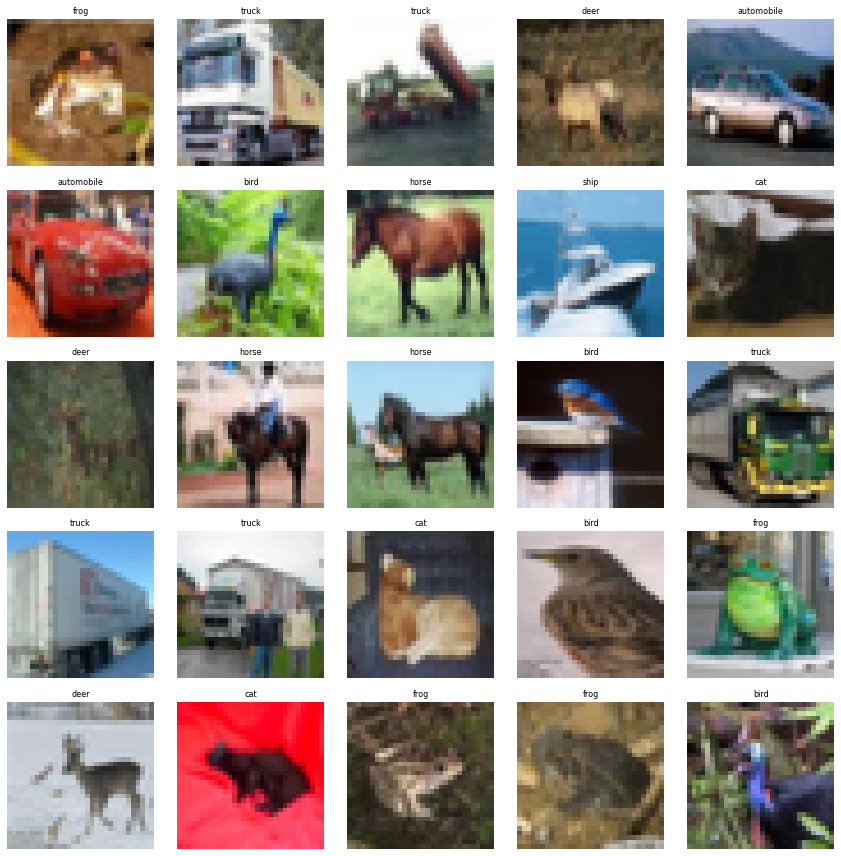

In [7]:
fig, ax = plt.subplots(5,5, figsize=(12, 12))
k = 0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(5):
    for j in range(5):
        # Plot the image
        ax[i][j].imshow(X_train[k])
        
        # Set the title with the class name
        ax[i][j].set_title(class_names[y_train[k]], fontsize=8)  # Use y_train[k][0] as the class label
        
        # Turn off axes for better display
        ax[i][j].axis('off')
        
        k += 1

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [8]:
K = len(set(y_train))
print('Number of classes:',K)
i = Input(shape=X_train[0].shape)

Number of classes: 10


In [9]:
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)

x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

In [10]:
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

In [11]:
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)

In [12]:
x = Dense(K,activation='softmax')(x)
model = Model(i,x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.4532 - loss: 1.7967 - val_accuracy: 0.6551 - val_loss: 1.0173
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6901 - loss: 0.8950 - val_accuracy: 0.7049 - val_loss: 0.8953


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True)
train_generator = data_generator.flow(X_train,y_train,batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,validation_data=(X_test,y_test),steps_per_epoch=steps_per_epoch,epochs=2)

Epoch 1/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7078 - loss: 0.8497 - val_accuracy: 0.7441 - val_loss: 0.7844
Epoch 2/2
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8438 - loss: 0.5681 - val_accuracy: 0.7405 - val_loss: 0.8008


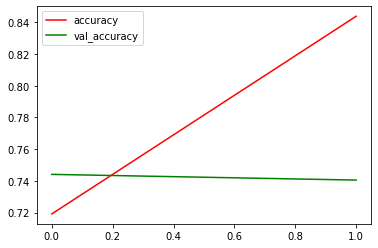

In [17]:
plt.plot(r.history['accuracy'],label='accuracy',color='red')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy',color = 'green')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
original label is cat and predicted label is cat


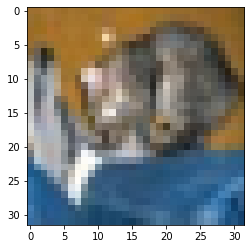

In [18]:
labels = '''airplane automobile bird cat deerdo frog horeship truck'''.split()

image_number = 0
plt.imshow(X_test[image_number])
n = np.array(X_test[image_number])

p = n.reshape(1,32,32,3)

predicted_label = labels[model.predict(p).argmax()]

original_label = labels[y_test[image_number]]
print("original label is {} and predicted label is {}".format(original_label,predicted_label))